## 1\. Introdução

**Motivação**

Vamos analisar dados sobre o consumo de energia elétrica residencial, comercial e industrial, em mega watts (MWh), da região sudeste do Brasil, entre os anos de 2004 e 2020. O conjunto de dados está neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv) e foi inspirado no conjunto de dados da Empresa de Pesquisa Energética (EPE), estatal do governo vinculada ao ministério de minas e energia, presente neste [link](https://www.epe.gov.br/pt/publicacoes-dados-abertos/publicacoes/consumo-de-energia-eletrica).

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [3]:
data = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [4]:
data.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [5]:
data.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   referencia   204 non-null    datetime64[ns]
 1   residencial  204 non-null    int64         
 2   industrial   204 non-null    int64         
 3   comercial    204 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.5 KB


<ipython-input-7-00f59aee07b5>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
<ipython-input-7-00f59aee07b5>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=data, x='referencia', y='comercial', marker="1", palette="pastel")
<ipython-input-7-00f59aee07b5>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=data, x='referencia', y='industrial', marker="1", palette="pastel")


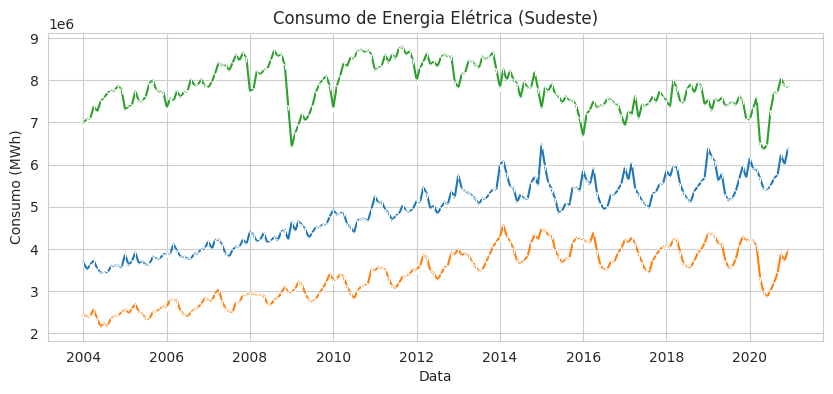

In [7]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=data, x='referencia', y='comercial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=data, x='referencia', y='industrial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

### **1.2. Definição**

Uma **série temporal** é um conjunto de dados composto pela coleta de amostras de uma ou mais variáveis em intervalos **fixos** de tempo (granularidade). É muito utilizada para análise do mercado de renda variável, dados econômicos, consumo de energia elétrica, etc.

> Uma série temporal representa a evolução de um fenômeno ao longo do tempo.

Note que o **tempo** é uma variável fundamental para esse tipo de análise. Portanto, note que:

 - O intervalo entre as medições é conhecido como **grão**;
 - A granularidade deve ser **fixa** para uma mesma série temporal;
 - Duas séries temporais só podem ser efetivamente comparadas se estiverem na mesma **granularidade**.

Séries temporais podem ser **decompostas** em componentes, são eles:

 - **Tendência**: Direção da evolução da variável ao longo do tempo;
 - **Sazonalidade**: Flutuações periódicas;
 - **Resíduo**: O restante, combinação linear de ruído e erros.

## 2\. Wrangling

O pacote Pandas trás uma série de métodos e funções que ajudam na manipulação de séries temporais.

### **2.1. Indexação**

Como as séries temporais são indexadas pelo tempo, podemos transformar a coluna temporal nos índices de uma dataframe Pandas, permitindo assim diversas operações "temporais".

In [8]:
data.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [9]:
data = data.set_index(keys=['referencia'])

In [10]:
data.head()

,residencial,industrial,comercial
referencia,,,
2004-01-01,3694386,6977471,2450453
2004-02-01,3511541,7084623,2396965
2004-03-01,3629455,7087613,2402521
2004-04-01,3733863,7384540,2580914
2004-05-01,3537269,7258307,2344084


### **2.2. Slicing**

O *slicing* ou corte (ou ainda fatiamento) é o processo de **selecionar** um intervalo de tempo de uma série temporal. Esse processo permite focar a análise de intervalos de tempo de interesse.

 - **Exemplo:** *Slicing* por ano.

<ipython-input-11-dd9f2adf429a>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")


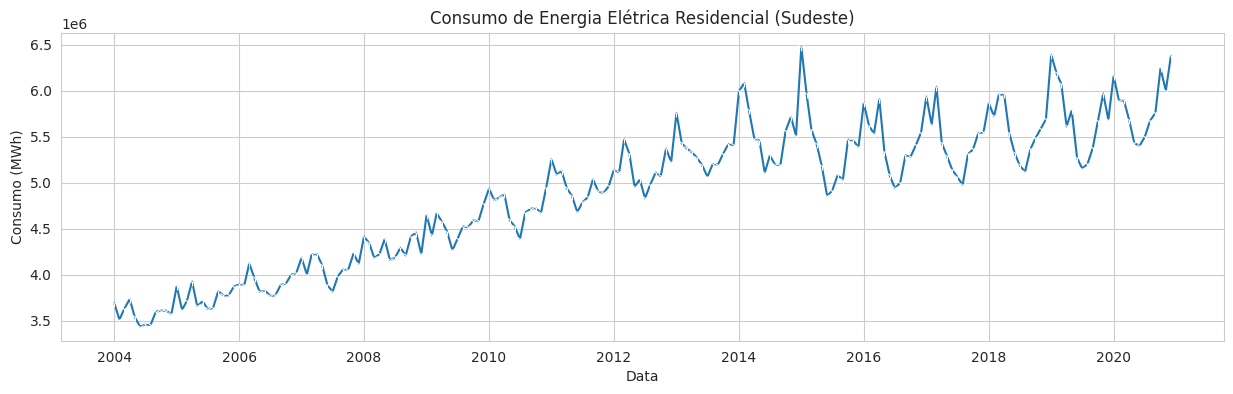

In [11]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(15, 4)

In [12]:
data['2019'].head()

<ipython-input-12-d19b413e78a6>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2019'].head()


,residencial,industrial,comercial
referencia,,,
2019-01-01,6389714,7545071,4370412
2019-02-01,6188834,7285407,4365504
2019-03-01,6072327,7556147,4303463
2019-04-01,5610278,7494816,4115920
2019-05-01,5785412,7597072,4141319


<ipython-input-13-d9701bd747c3>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  grafico = sns.lineplot(data=data['2019'], x='referencia', y='residencial', marker="1", palette="pastel")
<ipython-input-13-d9701bd747c3>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=data['2019'], x='referencia', y='residencial', marker="1", palette="pastel")


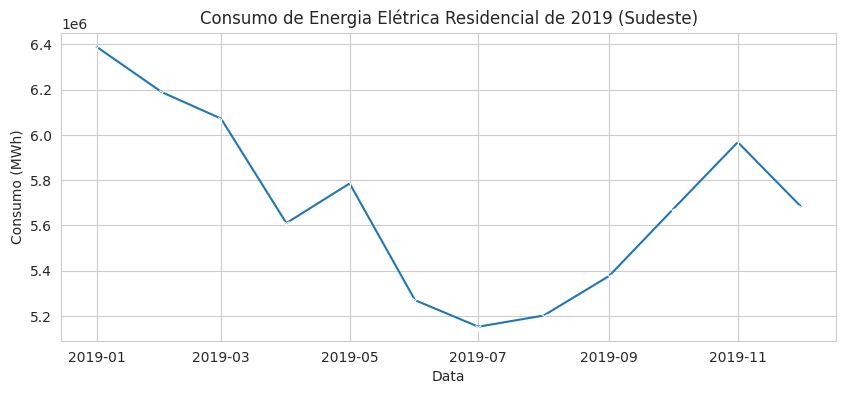

In [13]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data['2019'], x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial de 2019 (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

 - **Exemplo:** *Slicing* por intervalo de meses.

In [14]:
data['2019-01':'2019-06'].head()

,residencial,industrial,comercial
referencia,,,
2019-01-01,6389714,7545071,4370412
2019-02-01,6188834,7285407,4365504
2019-03-01,6072327,7556147,4303463
2019-04-01,5610278,7494816,4115920
2019-05-01,5785412,7597072,4141319


 - **Exemplo:** *Slicing* por intervalo de dias.

In [15]:
data['2019-01-15':'2019-02-15'].head()

,residencial,industrial,comercial
referencia,,,
2019-02-01,6188834,7285407,4365504


### **2.3. Resampling**

*Resampling* ou reamostragem é o processo de **aumentar/diminuir** a **granularidade** de uma série temporal, como ir segundos para horas ou de dias para meses, por exemplo. Para tanto, os dados dentro do intervalo de tempo devem ser agrupados por uma operação de **agregação** como soma ou média. Esse processo permite o resumo dos dados de uma série temporal.

- **Exemplo:** *Resampling* por trimestre.

 > **Nota**: O método `resample` do pacote Pandas utiliza o mesmo padrão de datas que o módulo `datetime` nativo do Python. O padrão pode ser conferido neste [link](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

In [16]:
resampled = data.resample(rule='3m').mean()

In [17]:
resampled.head()

,residencial,industrial,comercial
referencia,,,
2004-01-31,3.694386e+06,6.977471e+06,2.450453e+06
2004-04-30,3.624953e+06,7.185592e+06,2.460133e+06
2004-07-31,3.476112e+06,7.446800e+06,2.245696e+06
2004-10-31,3.552537e+06,7.740310e+06,2.322258e+06
2005-01-31,3.683949e+06,7.648244e+06,2.495533e+06


<ipython-input-18-48ab9fc71cbe>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=resampled, x='referencia', y='residencial', marker="1", palette="pastel")


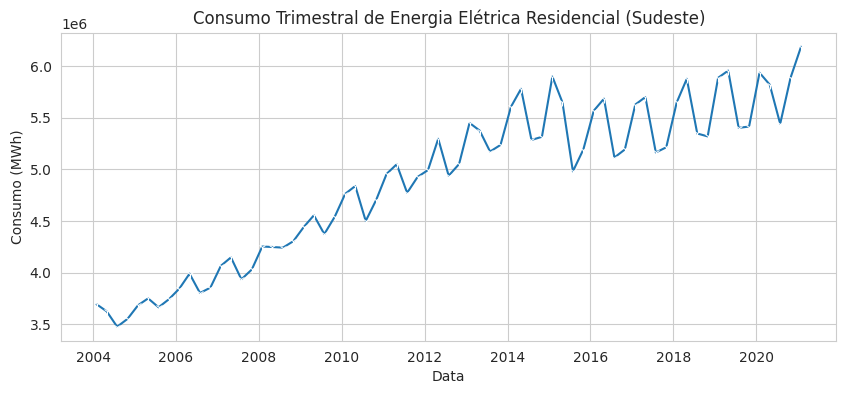

In [18]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=resampled, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo Trimestral de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

<ipython-input-19-d8b3ba7f1781>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")


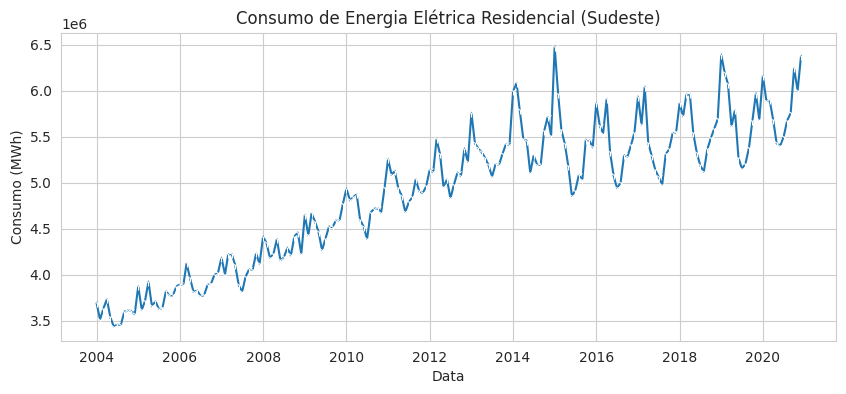

In [19]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

### **2.4. Visualização**

o gráfico de linha é naturalmente o mais indicado para a visualicão de séries temporais. Esse tipo de visualização pode ser complementado com múltiplos gráficos de linha utilizando um intervalo de tempo de interesse.

 - **Exemplo:** Consumo residencial por ano.

In [20]:
data['month'] = data.index.month
data['year'] = data.index.year

In [21]:
data.head()

,residencial,industrial,comercial,month,year
referencia,,,,,
2004-01-01,3694386,6977471,2450453,1,2004
2004-02-01,3511541,7084623,2396965,2,2004
2004-03-01,3629455,7087613,2402521,3,2004
2004-04-01,3733863,7384540,2580914,4,2004
2004-05-01,3537269,7258307,2344084,5,2004


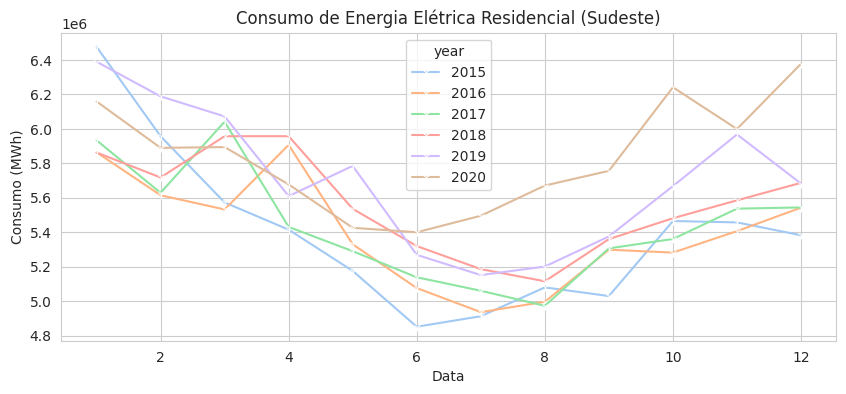

In [22]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data['2015':'2020'], x='month', y='residencial', hue='year', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

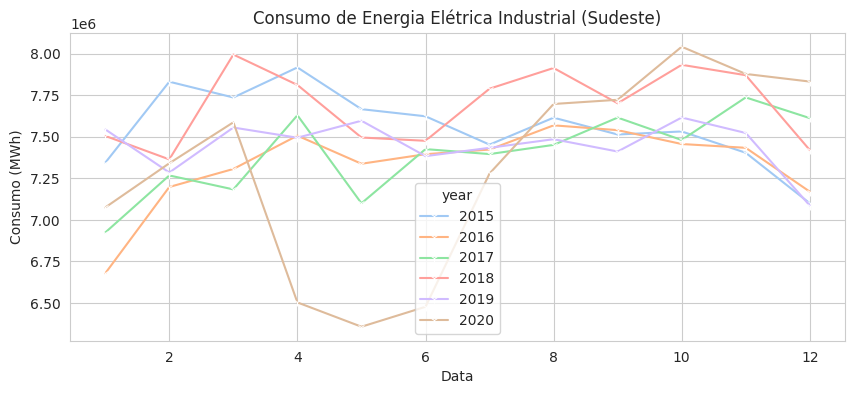

In [23]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data['2015':'2020'], x='month', y='industrial', hue='year', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Industrial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

## 3\. Componentes

Uma série temporal pode ser interpretada como a combinação linear de três componentes: tendência, sazonalidade e resíduo. Cada componente busca explicar uma característica da série temporal:

 - **Tendência**: Direção da evolução da variável ao longo do tempo;
 - **Sazonalidade**: Flutuações periódicas;
 - **Resíduo**: O restante, combinação linear de ruído e erros.

<ipython-input-24-f707b86d39d6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")


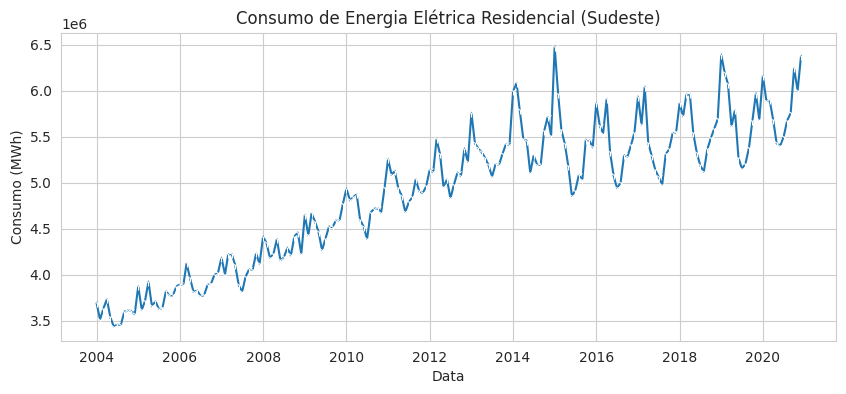

In [24]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

### **3.1. Pacote statsmodels**

**statmodels** é um pacote Python utilizado para exploração e visualização de dados através do uso de técnicas avançadas de estatística. A documentação pode ser encontrada neste [link](https://www.statsmodels.org/stable/index.html). Possui uma excelente integração com os DataFrames do pacote Python Pandas.

In [25]:
import statsmodels.api as sm

### **3.2. Decomposição**

Vamos utilizar o método `seasonal_decompose` do pacote statsmodel para decomport uma série temporal em suas componentes.

In [26]:
decomposicao = sm.tsa.seasonal_decompose(data[['residencial']], model='additive')

In [27]:
residuo = decomposicao.resid
tendencia = decomposicao.trend
sazonalidade = decomposicao.seasonal

In [28]:
sazonalidade.head()

referencia
2004-01-01    397799.669054
2004-02-01    199532.997179
2004-03-01    237189.830512
2004-04-01    116027.244575
2004-05-01    -67565.791884
Name: seasonal, dtype: float64